The sub-metric data that I used were the police incident blotter csv and geojson files. I plotted the reports on a heatmap using geopandas and matplotlib. Using the column called 'INCIDENTNEIGHBORHOOD' from the csv file, I counted the number of occurences of each neighborhood and based on this number assigned a darker color value to that neighborhood on the map. 

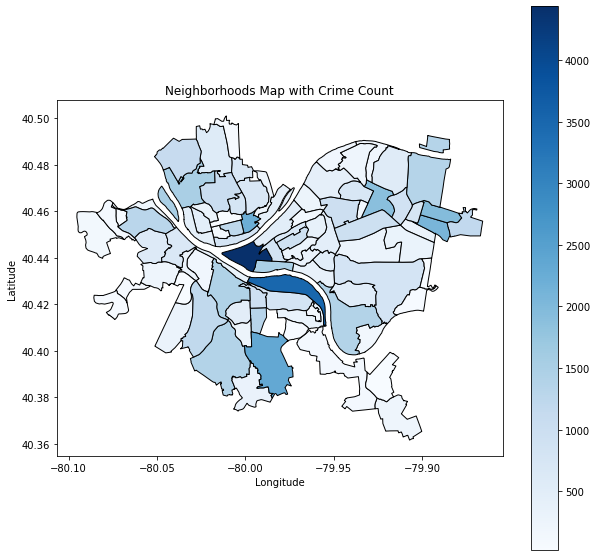

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the GeoJSON file for Pittsburgh neighborhoods
neighborhoods_column = gpd.read_file('Neighborhoods_.geojson')

# Load the CSV file containing incident report data
crime_count = pd.read_csv('crime_rates.csv')

# Count the number of crimes for each neighborhood
neighborhood_crime_count = crime_count.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='crime_count')

# Merge crime count data with neighborhood GeoDataFrame
merged = neighborhoods_column.merge(neighborhood_crime_count, left_on='hood', right_on='INCIDENTNEIGHBORHOOD', how='left')

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(ax=ax, column='crime_count', cmap='Blues', edgecolor='black', legend=True)
plt.title('Neighborhoods Map with Crime Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


There were a total of 340,996 reports over the 7 year time span where this data was collected (2016-2023). The map revealed that the two neighborhoods with the most reports were Downtown and South Side, these two areas would be good to avoid in a street race. However, by only looking at this graph it might be hard to tell which neighborhoods have the least reports. This is because there are many with very few. So here is a table that can show us exactly which neighborhoods have the fewest incident reports.

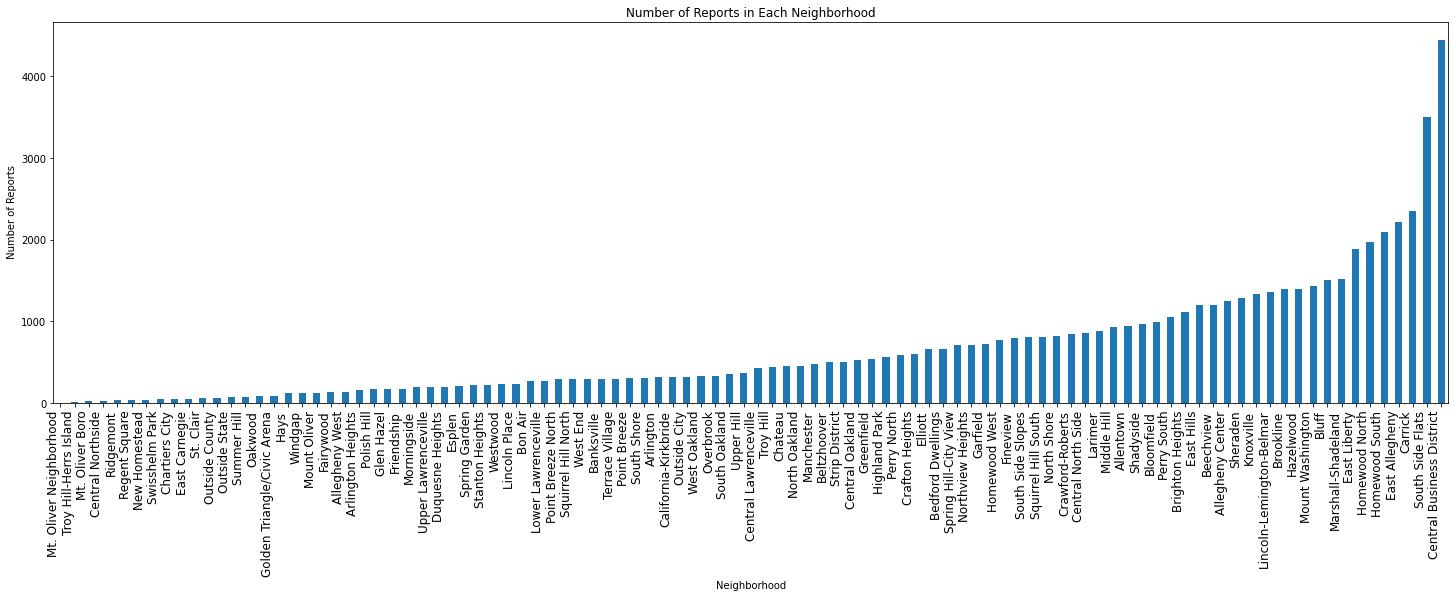

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('crime_rates.csv', index_col="INCIDENTNEIGHBORHOOD")

# Count the occurrences of each value in the 'INCIDENTNEIGHBORHOOD' column
counts = df.groupby("INCIDENTNEIGHBORHOOD").size()
df_sort=counts.sort_values()
# Plotting
plt.figure(figsize=(25, 7))
df_sort.plot(kind='bar')
plt.title('Number of Reports in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel(' Number of Reports')
plt.xticks(fontsize=12, ha='right')
plt.show()



From this table we can see more clearly that the two neighborhoods with the fewest incident reports were Mt. Oliver Boro and Mt. Oliver Neighborhood. Though these are listed as different locations the heat map reads them as one. Here it is. 

![Screenshot 2024-04-18 at 4.27.41 PM.png](<attachment:Screenshot 2024-04-18 at 4.27.41 PM.png>)
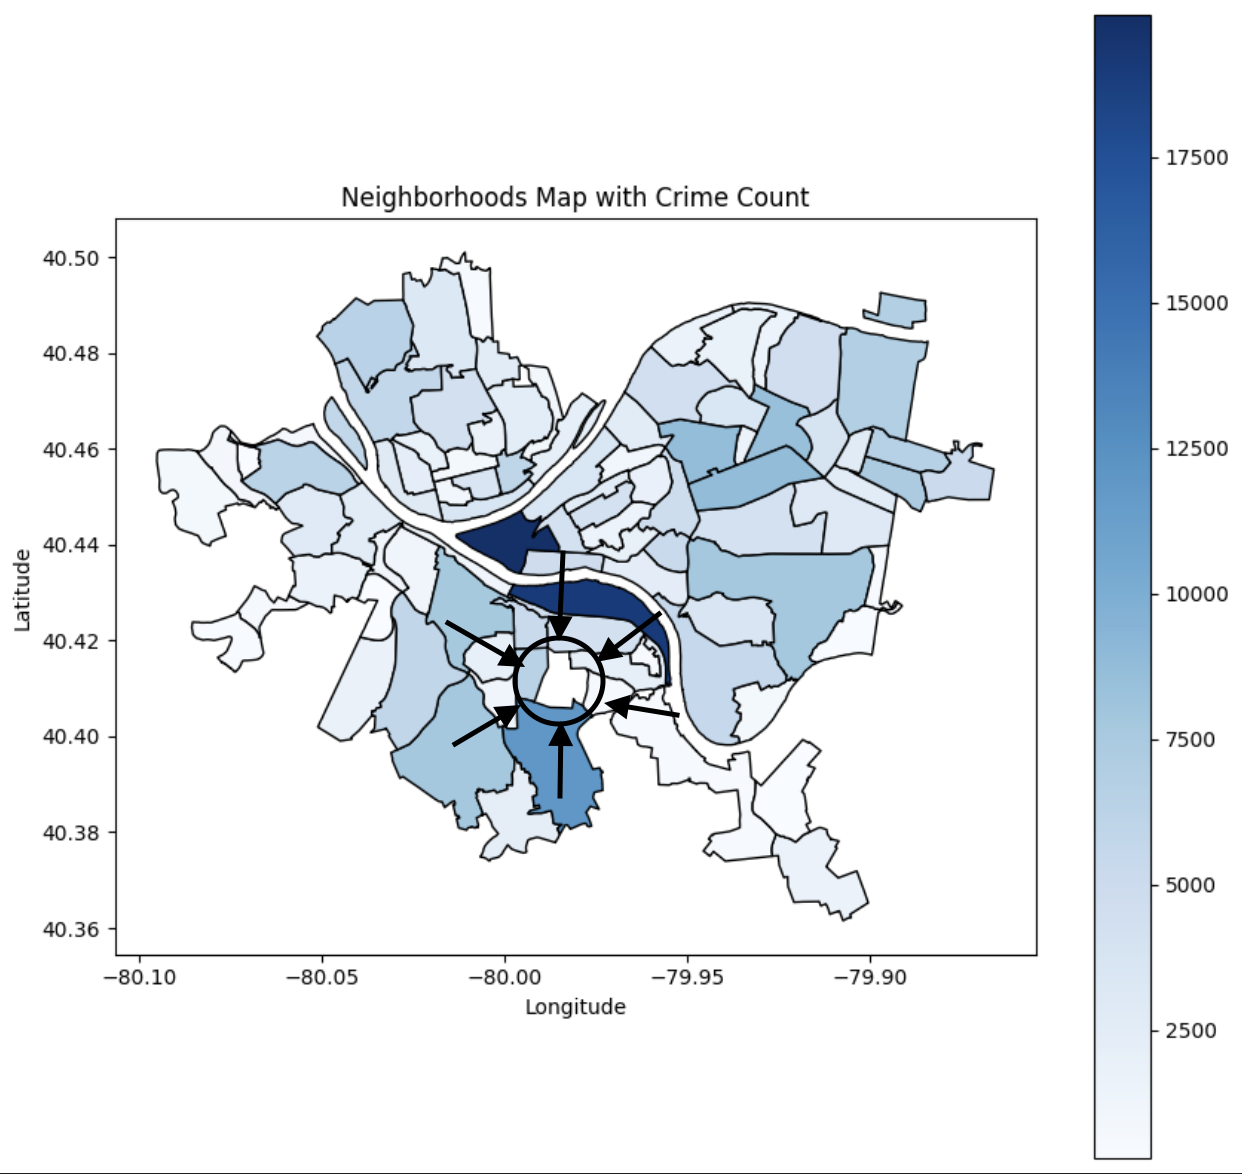

The next few neighborhoods with the fewest reports were:
1. Herrs Island
2. Outside County - not even in Pittburgh. 
3. Ridgemnont 
Making these and Mount Oliver optimal for a street race.